In [1]:
#Importamos las librerias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Cargamos el segundo DataFrame
dt = pd.read_csv('Datos_Toronto.csv')
dt = dt.drop(['Unnamed: 0'], axis=1)
dt.head(5)

C:\Users\Paulina\AppData\Local\Temp\ipykernel_396\1296315536.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  dt = pd.read_csv('Datos_Toronto.csv')


source                                    name host_name  \
0  previous scrape                                   Marco   IsmaÃ«l   
1  previous scrape          Sunny Little Portugal Bachelor    Alyson   
2  previous scrape      $950 / 1br - LARGE Beautiful Attic   Stephen   
3  previous scrape                          Sarahâ house   Natalia   
4  previous scrape  81-05/ private room on the main floor.    Maggie   

   host_since    host_location host_response_time host_is_superhost  \
0  04/06/2016  Toronto, Canada         Sin tiempo                 f   
1  26/08/2016  Toronto, Canada         Sin tiempo                 f   
2  20/06/2013  Toronto, Canada         Sin tiempo                 f   
3  10/04/2014  Toronto, Canada       within a day                 f   
4  11/07/2017  Toronto, Canada         Sin tiempo                 f   

  host_listings_count  host_verifications host_identity_verified  ...  \
0                 1.0  ['email', 'phone']                      f  ...   
1                 1.0           ['phone']                      f  ...   
2                 1.0  ['email', 'phone']                      t  ...   
3                 5.0  ['email', 'phone']                      t  ...   
4                 9.0  ['email', 'phone']                      t  ...   

  number_of_reviews_ltm number_of_reviews_l30d review_scores_rating  \
0                   0.0                    0.0                  4.9   
1                   0.0                    0.0                  4.9   
2                   0.0                    0.0                  4.9   
3                   0.0                    0.0                  4.9   
4                   0.0                    0.0                  4.9   

  review_scores_accuracy review_scores_cleanliness review_scores_checkin  \
0                   4.75                       4.9                   4.9   
1                   4.75                       4.9                   4.9   
2                   4.75                       4.9                   4.9   
3                   4.75                       4.9                   4.9   
4                   4.75                       4.9                   4.9   

  review_scores_communication review_scores_location  review_scores_value  \
0                         5.0                    4.9                  4.7   
1                         5.0                    4.9                  4.7   
2                         5.0                    4.9                  4.7   
3                         5.0                    4.9                  4.7   
4                         5.0                    4.9                  4.7   

   reviews_per_month  
0               0.34  
1               0.34  
2               0.34  
3               0.34  
4               0.34  

[5 rows x 48 columns]

In [3]:
#Limitamos el DataFrame a las variables que vamos a usar 
f1 = dt.iloc[ : , [21, 6, 9, 11, 12, 17, 26, 27, 30, 42]]
f1

host_response_rate host_is_superhost host_identity_verified  \
0                    96.0                 f                      f   
1                    96.0                 f                      f   
2                    96.0                 f                      t   
3                   100.0                 f                      t   
4                    96.0                 f                      t   
...                   ...               ...                    ...   
21862               100.0                 t                      t   
21863                96.0                 f                      t   
21864               100.0                 f                      t   
21865               100.0                 t                      t   
21866                98.3                 f                      t   

                   property_type        room_type instant_bookable  \
0             Entire rental unit  Entire home/apt                f   
1             Entire rental unit  Entire home/apt                f   
2           Private room in loft     Private room                f   
3           Private room in home     Private room                f   
4           Private room in home     Private room                t   
...                          ...              ...              ...   
21862         Entire rental unit  Entire home/apt                f   
21863         Entire rental unit  Entire home/apt                f   
21864  Entire serviced apartment  Entire home/apt                t   
21865         Entire guest suite  Entire home/apt                t   
21866         Entire rental unit  Entire home/apt                f   

       accommodates  bathrooms   price  review_scores_cleanliness  
0               1.0      100.0  165.36                       4.90  
1               1.0      100.0  165.36                       4.90  
2               1.0      100.0  165.36                       4.90  
3               2.0      100.0  165.36                       4.90  
4               2.0      100.0  165.36                       4.90  
...             ...        ...     ...                        ...  
21862           1.0      100.0  165.36                       5.00  
21863           2.0      100.0  165.36                       5.00  
21864           5.0      100.0  165.36                       4.90  
21865           4.0      100.0  165.36                       4.89  
21866           3.0      100.0  165.36                       5.00  

[21867 rows x 10 columns]

In [4]:
#Caso especial para la variable "host_is_superhost"
f1['host_is_superhost'] = f1['host_is_superhost'].astype(str)
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0.0, 't': 1})
f1['host_is_superhost'] = pd.to_numeric(f1['host_is_superhost'], errors='coerce').fillna(0).astype(float)

#Caso especial para la variable "host_identity_verified"
f1['host_identity_verified'] = f1['host_identity_verified'].astype(str)
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0.0, 't': 1})
f1['host_identity_verified'] = pd.to_numeric(f1['host_identity_verified'], errors='coerce').fillna(0).astype(float)

C:\Users\Paulina\AppData\Local\Temp\ipykernel_396\1373811180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].astype(str)
C:\Users\Paulina\AppData\Local\Temp\ipykernel_396\1373811180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0.0, 't': 1})
C:\Users\Paulina\AppData\Local\Temp\ipykernel_396\1373811180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [5]:
#Convertimos los booleanos a numéricos
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

#Convertimos los string a numéricos
from sklearn.preprocessing import LabelEncoder   #importamos libreria 

encoder = LabelEncoder()
f1['property_type'] = encoder.fit_transform(f1['property_type'])
f1['property_type'] = f1['property_type'].astype(float)

#Hacemos un filtro para la variable "room_type"
f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

C:\Users\Paulina\AppData\Local\Temp\ipykernel_396\1611080944.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})
C:\Users\Paulina\AppData\Local\Temp\ipykernel_396\1611080944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})
C:\Users\Paulina\AppData\Local\Temp\ipykernel_396\1611080944.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [6]:
#Hacemos un DataFrame para cada categoria 
ft_1 = f1[(f1["room_type"] == 1)]              #ft_1 = Entire home/apt
ft_2 = f1[(f1["room_type"] == 2)]              #ft_2 = Private room
ft_3 = f1[(f1["room_type"] == 3)]              #ft_3 = Shared room
ft_4 = f1[(f1["room_type"] == 4)]              #ft_4 = Hotel room

-------------------------------DataFrame: Shared room-------------------------------

In [7]:
#Obtenemos la información del DataFrame
ft_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 46 to 20796
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         69 non-null     float64
 1   host_is_superhost          69 non-null     float64
 2   host_identity_verified     69 non-null     float64
 3   property_type              69 non-null     float64
 4   room_type                  69 non-null     int64  
 5   instant_bookable           69 non-null     int64  
 6   accommodates               69 non-null     float64
 7   bathrooms                  69 non-null     float64
 8   price                      69 non-null     float64
 9   review_scores_cleanliness  69 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 5.9 KB


Grafico 1:

<Axes: xlabel='room_type', ylabel='price'>

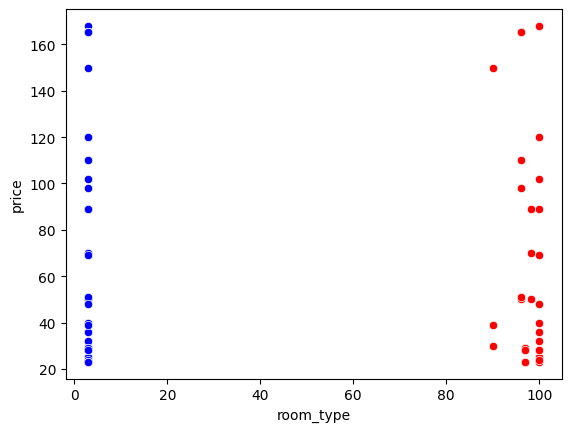

In [8]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_3)
sns.scatterplot(x='host_response_rate', y='price', color='red', data=ft_3)

Grafico 2:

<Axes: xlabel='room_type', ylabel='price'>

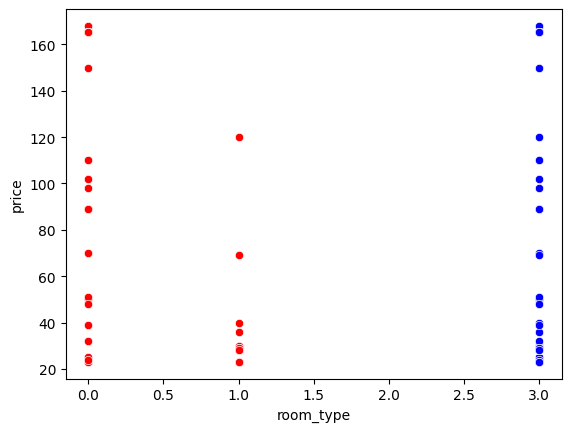

In [9]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_3)
sns.scatterplot(x='host_is_superhost', y='price', color='red', data=ft_3)

Grafico 3:

<Axes: xlabel='room_type', ylabel='price'>

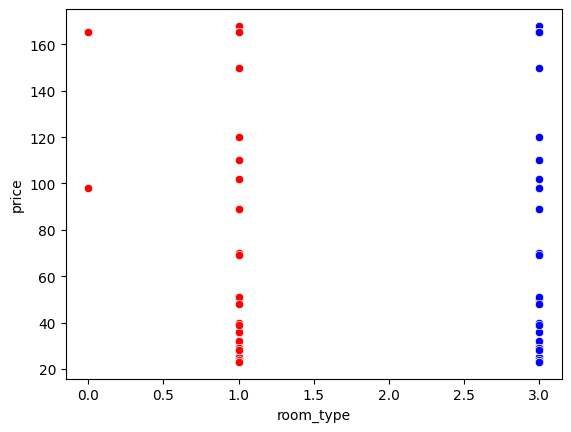

In [10]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_3)
sns.scatterplot(x='host_identity_verified', y='price', color='red', data=ft_3)

Grafico 4:

<Axes: xlabel='room_type', ylabel='price'>

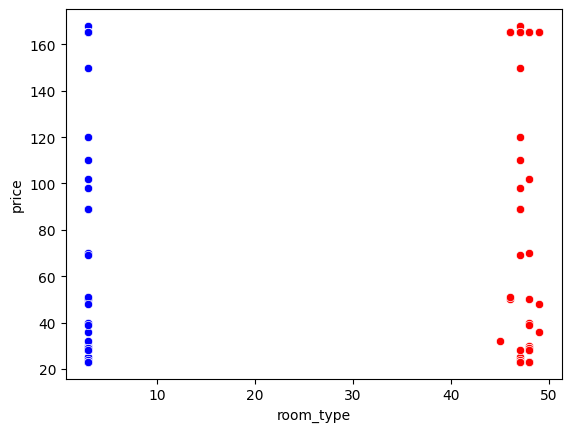

In [11]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_3)
sns.scatterplot(x='property_type', y='price', color='red', data=ft_3)

Grafico 5:

<Axes: xlabel='room_type', ylabel='price'>

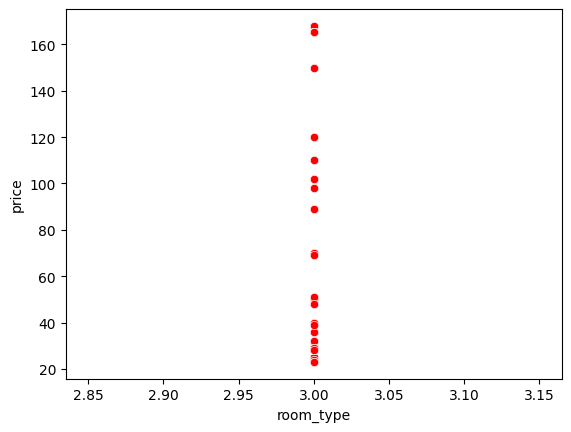

In [12]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_3)
sns.scatterplot(x='room_type', y='price', color='red', data=ft_3)

Grafico 6:

<Axes: xlabel='room_type', ylabel='price'>

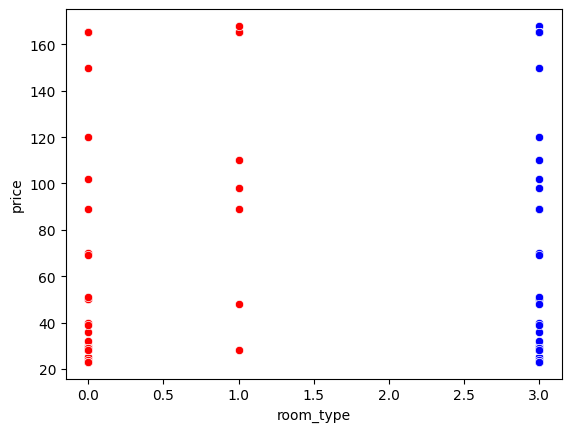

In [13]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_3)
sns.scatterplot(x='instant_bookable', y='price', color='red', data=ft_3)

Grafico 7:

<Axes: xlabel='room_type', ylabel='price'>

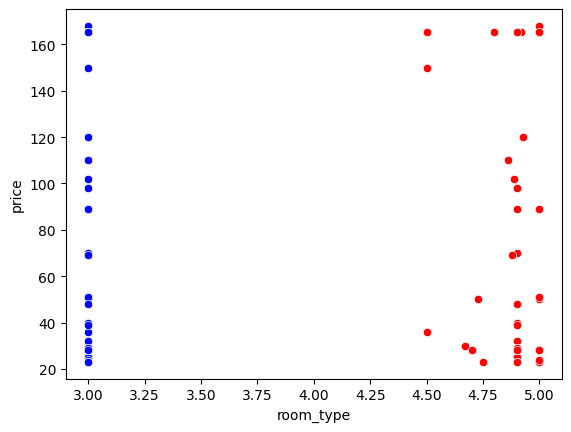

In [14]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_3)
sns.scatterplot(x='review_scores_cleanliness', y='price', color='red', data=ft_3)

Grafico 8:

<Axes: xlabel='room_type', ylabel='accommodates'>

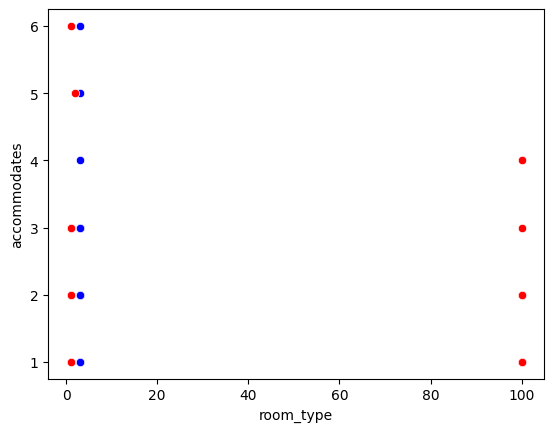

In [15]:
from turtle import color 

sns.scatterplot(x='room_type', y='accommodates', color='blue', data=ft_3)
sns.scatterplot(x='bathrooms', y='accommodates', color='red', data=ft_3)

Declaración de variables dependientes e independientes 

In [16]:
#declaramos las variables dependientes e independientes para la regresión lineal
var_indep_t = ft_3[['host_response_rate']]
var_dep_t = ft_3['price']

In [17]:
#declaración de las variables independientes que se van a comparar con el precio 
var_indep_t2 = ft_3[['host_is_superhost']]
var_indep_t3 = ft_3[['room_type']]
var_indep_t4 = ft_3[['host_identity_verified']]
var_indep_t5 = ft_3[['property_type']]
var_indep_t6 = ft_3[['instant_bookable']]
var_indep_t7 = ft_3[['review_scores_cleanliness']]

In [18]:
#variables accommodates vs bathrooms
var_indep_t8 = ft_3[['bathrooms']]
var_dep_t2 = ft_3['accommodates']

Definición del modelo 

In [19]:
#se define model como función de regresión lineal 
from sklearn.linear_model import LinearRegression 

Model_t1 = LinearRegression()
Model_t2 = LinearRegression()
Model_t3 = LinearRegression()
Model_t4 = LinearRegression()
Model_t5 = LinearRegression()
Model_t6 = LinearRegression()
Model_t7 = LinearRegression()
Model_t8 = LinearRegression()

In [20]:
#ajustamos el modelo con las variables antes declaradas
Model_t1.fit(X = var_indep_t, y = var_dep_t)
Model_t2.fit(X = var_indep_t2, y = var_dep_t)
Model_t3.fit(X = var_indep_t3, y = var_dep_t)
Model_t4.fit(X = var_indep_t4, y = var_dep_t)
Model_t5.fit(X = var_indep_t5, y = var_dep_t)
Model_t6.fit(X = var_indep_t6, y = var_dep_t)
Model_t7.fit(X = var_indep_t7, y = var_dep_t)
Model_t8.fit(X = var_indep_t8, y = var_dep_t2)

LinearRegression()

Obtenemos el coeficiente para el modelo 1

In [21]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
Model_t1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-9.24892613]),
 'rank_': 1,
 'singular_': array([17.51646017]),
 'intercept_': 986.9585792276429}

In [22]:
#predecimos valores del modelo matemático y=-9.24892613 + 986.9585792276429
y_Pred_t = Model_t1.predict(X = ft_3[['host_response_rate']])
y_Pred_t

array([ 99.0616711 ,  99.0616711 ,  99.0616711 ,  99.0616711 ,
        99.0616711 ,  99.0616711 ,  99.0616711 ,  99.0616711 ,
        99.0616711 ,  62.06596659,  99.0616711 ,  62.06596659,
        99.0616711 ,  99.0616711 ,  99.0616711 ,  99.0616711 ,
       154.55522785,  99.0616711 ,  89.81274497,  89.81274497,
        89.81274497,  89.81274497,  99.0616711 ,  62.06596659,
        62.06596659,  99.0616711 ,  77.78914101,  77.78914101,
        62.06596659, 154.55522785,  62.06596659,  62.06596659,
        89.81274497,  89.81274497,  77.78914101,  62.06596659,
        62.06596659,  99.0616711 ,  62.06596659,  62.06596659,
        89.81274497,  89.81274497,  62.06596659,  89.81274497,
        89.81274497,  89.81274497,  89.81274497,  89.81274497,
        89.81274497,  89.81274497,  89.81274497,  89.81274497,
        89.81274497,  99.0616711 ,  62.06596659,  62.06596659,
        99.0616711 ,  89.81274497,  89.81274497,  99.0616711 ,
       154.55522785,  99.0616711 ,  99.0616711 ,  99.06

In [23]:
#insertamos la columna de predicciones en el DataFrame 
ft_3.insert(0, 'Predicciones_1', y_Pred_t)
ft_3

Predicciones_1  host_response_rate  host_is_superhost  \
46          99.061671                96.0                0.0   
76          99.061671                96.0                0.0   
120         99.061671                96.0                0.0   
288         99.061671                96.0                0.0   
319         99.061671                96.0                0.0   
...               ...                 ...                ...   
18957       99.061671                96.0                0.0   
19148       99.061671                96.0                0.0   
19778       99.061671                96.0                0.0   
19825       99.061671                96.0                0.0   
20796       99.061671                96.0                0.0   

       host_identity_verified  property_type  room_type  instant_bookable  \
46                        0.0           47.0          3                 0   
76                        1.0           48.0          3                 1   
120                       1.0           46.0          3                 0   
288                       1.0           47.0          3                 0   
319                       0.0           47.0          3                 0   
...                       ...            ...        ...               ...   
18957                     0.0           48.0          3                 0   
19148                     1.0           46.0          3                 0   
19778                     0.0           48.0          3                 0   
19825                     0.0           48.0          3                 0   
20796                     1.0           46.0          3                 0   

       accommodates  bathrooms   price  review_scores_cleanliness  
46              1.0      100.0  165.36                       4.90  
76              2.0      100.0  165.36                       5.00  
120             2.0      100.0  165.36                       4.90  
288             2.0      100.0  165.36                       4.90  
319             1.0      100.0  165.36                       4.90  
...             ...        ...     ...                        ...  
18957           2.0      100.0  165.36                       4.90  
19148           2.0      100.0  165.36                       4.92  
19778           1.0      100.0  165.36                       4.90  
19825           1.0      100.0  165.36                       4.90  
20796           1.0      100.0  165.36                       5.00  

[69 rows x 11 columns]

Obtenemos el coeficiente para el modelo 2

In [24]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
Model_t2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-94.72486772]),
 'rank_': 1,
 'singular_': array([4.05398355]),
 'intercept_': 127.42857142857143}

In [25]:
#predecimos valores del modelo matemático y=-94.72486772 + 127.42857142857143
y_Pred_t2 = Model_t2.predict(X = ft_3[['host_is_superhost']])
y_Pred_t2

array([127.42857143, 127.42857143, 127.42857143, 127.42857143,
       127.42857143, 127.42857143, 127.42857143, 127.42857143,
       127.42857143,  32.7037037 , 127.42857143, 127.42857143,
       127.42857143, 127.42857143, 127.42857143, 127.42857143,
        32.7037037 , 127.42857143,  32.7037037 ,  32.7037037 ,
        32.7037037 ,  32.7037037 , 127.42857143,  32.7037037 ,
        32.7037037 , 127.42857143, 127.42857143, 127.42857143,
        32.7037037 , 127.42857143, 127.42857143, 127.42857143,
        32.7037037 ,  32.7037037 , 127.42857143,  32.7037037 ,
        32.7037037 , 127.42857143, 127.42857143, 127.42857143,
        32.7037037 ,  32.7037037 , 127.42857143,  32.7037037 ,
        32.7037037 ,  32.7037037 ,  32.7037037 ,  32.7037037 ,
        32.7037037 ,  32.7037037 ,  32.7037037 ,  32.7037037 ,
        32.7037037 , 127.42857143, 127.42857143, 127.42857143,
       127.42857143,  32.7037037 ,  32.7037037 , 127.42857143,
       127.42857143, 127.42857143, 127.42857143, 127.42

In [26]:
#insertamos la columna de predicciones en el DataFrame 
ft_3.insert(1, 'Predicciones_2', y_Pred_t2)
ft_3

Predicciones_1  Predicciones_2  host_response_rate  host_is_superhost  \
46          99.061671      127.428571                96.0                0.0   
76          99.061671      127.428571                96.0                0.0   
120         99.061671      127.428571                96.0                0.0   
288         99.061671      127.428571                96.0                0.0   
319         99.061671      127.428571                96.0                0.0   
...               ...             ...                 ...                ...   
18957       99.061671      127.428571                96.0                0.0   
19148       99.061671      127.428571                96.0                0.0   
19778       99.061671      127.428571                96.0                0.0   
19825       99.061671      127.428571                96.0                0.0   
20796       99.061671      127.428571                96.0                0.0   

       host_identity_verified  property_type  room_type  instant_bookable  \
46                        0.0           47.0          3                 0   
76                        1.0           48.0          3                 1   
120                       1.0           46.0          3                 0   
288                       1.0           47.0          3                 0   
319                       0.0           47.0          3                 0   
...                       ...            ...        ...               ...   
18957                     0.0           48.0          3                 0   
19148                     1.0           46.0          3                 0   
19778                     0.0           48.0          3                 0   
19825                     0.0           48.0          3                 0   
20796                     1.0           46.0          3                 0   

       accommodates  bathrooms   price  review_scores_cleanliness  
46              1.0      100.0  165.36                       4.90  
76              2.0      100.0  165.36                       5.00  
120             2.0      100.0  165.36                       4.90  
288             2.0      100.0  165.36                       4.90  
319             1.0      100.0  165.36                       4.90  
...             ...        ...     ...                        ...  
18957           2.0      100.0  165.36                       4.90  
19148           2.0      100.0  165.36                       4.92  
19778           1.0      100.0  165.36                       4.90  
19825           1.0      100.0  165.36                       4.90  
20796           1.0      100.0  165.36                       5.00  

[69 rows x 12 columns]

Obtenemos el coeficiente para el modelo 3

In [27]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
Model_t3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': 90.3623188405797}

In [28]:
#predecimos valores del modelo matemático y=0 + 90.3623188405797
y_Pred_t3 = Model_t3.predict(X = ft_3[['room_type']])
y_Pred_t3

array([90.36231884, 90.36231884, 90.36231884, 90.36231884, 90.36231884,
       90.36231884, 90.36231884, 90.36231884, 90.36231884, 90.36231884,
       90.36231884, 90.36231884, 90.36231884, 90.36231884, 90.36231884,
       90.36231884, 90.36231884, 90.36231884, 90.36231884, 90.36231884,
       90.36231884, 90.36231884, 90.36231884, 90.36231884, 90.36231884,
       90.36231884, 90.36231884, 90.36231884, 90.36231884, 90.36231884,
       90.36231884, 90.36231884, 90.36231884, 90.36231884, 90.36231884,
       90.36231884, 90.36231884, 90.36231884, 90.36231884, 90.36231884,
       90.36231884, 90.36231884, 90.36231884, 90.36231884, 90.36231884,
       90.36231884, 90.36231884, 90.36231884, 90.36231884, 90.36231884,
       90.36231884, 90.36231884, 90.36231884, 90.36231884, 90.36231884,
       90.36231884, 90.36231884, 90.36231884, 90.36231884, 90.36231884,
       90.36231884, 90.36231884, 90.36231884, 90.36231884, 90.36231884,
       90.36231884, 90.36231884, 90.36231884, 90.36231884])

In [29]:
#insertamos la columna de predicciones en el DataFrame 
ft_3.insert(2, 'Predicciones_3', y_Pred_t3)
ft_3

Predicciones_1  Predicciones_2  Predicciones_3  host_response_rate  \
46          99.061671      127.428571       90.362319                96.0   
76          99.061671      127.428571       90.362319                96.0   
120         99.061671      127.428571       90.362319                96.0   
288         99.061671      127.428571       90.362319                96.0   
319         99.061671      127.428571       90.362319                96.0   
...               ...             ...             ...                 ...   
18957       99.061671      127.428571       90.362319                96.0   
19148       99.061671      127.428571       90.362319                96.0   
19778       99.061671      127.428571       90.362319                96.0   
19825       99.061671      127.428571       90.362319                96.0   
20796       99.061671      127.428571       90.362319                96.0   

       host_is_superhost  host_identity_verified  property_type  room_type  \
46                   0.0                     0.0           47.0          3   
76                   0.0                     1.0           48.0          3   
120                  0.0                     1.0           46.0          3   
288                  0.0                     1.0           47.0          3   
319                  0.0                     0.0           47.0          3   
...                  ...                     ...            ...        ...   
18957                0.0                     0.0           48.0          3   
19148                0.0                     1.0           46.0          3   
19778                0.0                     0.0           48.0          3   
19825                0.0                     0.0           48.0          3   
20796                0.0                     1.0           46.0          3   

       instant_bookable  accommodates  bathrooms   price  \
46                    0           1.0      100.0  165.36   
76                    1           2.0      100.0  165.36   
120                   0           2.0      100.0  165.36   
288                   0           2.0      100.0  165.36   
319                   0           1.0      100.0  165.36   
...                 ...           ...        ...     ...   
18957                 0           2.0      100.0  165.36   
19148                 0           2.0      100.0  165.36   
19778                 0           1.0      100.0  165.36   
19825                 0           1.0      100.0  165.36   
20796                 0           1.0      100.0  165.36   

       review_scores_cleanliness  
46                          4.90  
76                          5.00  
120                         4.90  
288                         4.90  
319                         4.90  
...                          ...  
18957                       4.90  
19148                       4.92  
19778                       4.90  
19825                       4.90  
20796                       5.00  

[69 rows x 13 columns]

Obtenemos el coeficiente para el modelo 4

In [30]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
Model_t4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-90.0922963]),
 'rank_': 1,
 'singular_': array([3.42624144]),
 'intercept_': 160.86933333333337}

In [31]:
#predecimos valores para el modelo matemático y=-90.0922963 + 160.86933333333337
y_Pred_t4 = Model_t4.predict(X = ft_3[['host_identity_verified']])
y_Pred_t4

array([160.86933333,  70.77703704,  70.77703704,  70.77703704,
       160.86933333, 160.86933333, 160.86933333, 160.86933333,
       160.86933333,  70.77703704, 160.86933333,  70.77703704,
        70.77703704,  70.77703704,  70.77703704,  70.77703704,
        70.77703704,  70.77703704,  70.77703704,  70.77703704,
        70.77703704,  70.77703704, 160.86933333,  70.77703704,
        70.77703704, 160.86933333,  70.77703704,  70.77703704,
        70.77703704,  70.77703704,  70.77703704,  70.77703704,
        70.77703704,  70.77703704,  70.77703704,  70.77703704,
        70.77703704,  70.77703704,  70.77703704,  70.77703704,
        70.77703704,  70.77703704,  70.77703704,  70.77703704,
        70.77703704,  70.77703704,  70.77703704,  70.77703704,
        70.77703704,  70.77703704,  70.77703704,  70.77703704,
        70.77703704,  70.77703704,  70.77703704,  70.77703704,
        70.77703704,  70.77703704,  70.77703704,  70.77703704,
        70.77703704, 160.86933333, 160.86933333, 160.86

In [32]:
#insertamos la columna de predicciones en el DataFrame 
ft_3.insert(3, 'Predicciones_4', y_Pred_t4)
ft_3

Predicciones_1  Predicciones_2  Predicciones_3  Predicciones_4  \
46          99.061671      127.428571       90.362319      160.869333   
76          99.061671      127.428571       90.362319       70.777037   
120         99.061671      127.428571       90.362319       70.777037   
288         99.061671      127.428571       90.362319       70.777037   
319         99.061671      127.428571       90.362319      160.869333   
...               ...             ...             ...             ...   
18957       99.061671      127.428571       90.362319      160.869333   
19148       99.061671      127.428571       90.362319       70.777037   
19778       99.061671      127.428571       90.362319      160.869333   
19825       99.061671      127.428571       90.362319      160.869333   
20796       99.061671      127.428571       90.362319       70.777037   

       host_response_rate  host_is_superhost  host_identity_verified  \
46                   96.0                0.0                     0.0   
76                   96.0                0.0                     1.0   
120                  96.0                0.0                     1.0   
288                  96.0                0.0                     1.0   
319                  96.0                0.0                     0.0   
...                   ...                ...                     ...   
18957                96.0                0.0                     0.0   
19148                96.0                0.0                     1.0   
19778                96.0                0.0                     0.0   
19825                96.0                0.0                     0.0   
20796                96.0                0.0                     1.0   

       property_type  room_type  instant_bookable  accommodates  bathrooms  \
46              47.0          3                 0           1.0      100.0   
76              48.0          3                 1           2.0      100.0   
120             46.0          3                 0           2.0      100.0   
288             47.0          3                 0           2.0      100.0   
319             47.0          3                 0           1.0      100.0   
...              ...        ...               ...           ...        ...   
18957           48.0          3                 0           2.0      100.0   
19148           46.0          3                 0           2.0      100.0   
19778           48.0          3                 0           1.0      100.0   
19825           48.0          3                 0           1.0      100.0   
20796           46.0          3                 0           1.0      100.0   

        price  review_scores_cleanliness  
46     165.36                       4.90  
76     165.36                       5.00  
120    165.36                       4.90  
288    165.36                       4.90  
319    165.36                       4.90  
...       ...                        ...  
18957  165.36                       4.90  
19148  165.36                       4.92  
19778  165.36                       4.90  
19825  165.36                       4.90  
20796  165.36                       5.00  

[69 rows x 14 columns]

Obtenemos el coeficiente para el modelo 5

In [33]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
Model_t5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-7.01008523]),
 'rank_': 1,
 'singular_': array([6.38839528]),
 'intercept_': 423.90014204545486}

In [34]:
#predecimos valores para el modelo matemático y=-7.01008523 + 423.90014204545486
y_Pred_t5 = Model_t5.predict(X = ft_3[['property_type']])
y_Pred_t5

array([ 94.42613636,  87.41605114, 101.43622159,  94.42613636,
        94.42613636,  87.41605114,  87.41605114,  80.40596591,
        94.42613636,  80.40596591,  87.41605114,  94.42613636,
        87.41605114,  87.41605114,  87.41605114,  87.41605114,
        87.41605114,  87.41605114,  87.41605114,  87.41605114,
        87.41605114,  87.41605114,  87.41605114,  87.41605114,
        87.41605114,  94.42613636,  94.42613636, 101.43622159,
        94.42613636,  87.41605114,  87.41605114, 108.44630682,
        87.41605114,  87.41605114,  87.41605114,  94.42613636,
        94.42613636, 101.43622159,  80.40596591,  94.42613636,
        87.41605114,  87.41605114,  94.42613636,  87.41605114,
        87.41605114,  87.41605114,  87.41605114,  87.41605114,
        87.41605114,  87.41605114,  87.41605114,  87.41605114,
        87.41605114,  94.42613636,  94.42613636,  94.42613636,
        94.42613636,  94.42613636,  94.42613636,  87.41605114,
        94.42613636,  80.40596591,  94.42613636,  87.41

In [35]:
#insertamos la columna de predicciones en el DataFrame 
ft_3.insert(4, 'Predicciones_5', y_Pred_t5)
ft_3

Predicciones_1  Predicciones_2  Predicciones_3  Predicciones_4  \
46          99.061671      127.428571       90.362319      160.869333   
76          99.061671      127.428571       90.362319       70.777037   
120         99.061671      127.428571       90.362319       70.777037   
288         99.061671      127.428571       90.362319       70.777037   
319         99.061671      127.428571       90.362319      160.869333   
...               ...             ...             ...             ...   
18957       99.061671      127.428571       90.362319      160.869333   
19148       99.061671      127.428571       90.362319       70.777037   
19778       99.061671      127.428571       90.362319      160.869333   
19825       99.061671      127.428571       90.362319      160.869333   
20796       99.061671      127.428571       90.362319       70.777037   

       Predicciones_5  host_response_rate  host_is_superhost  \
46          94.426136                96.0                0.0   
76          87.416051                96.0                0.0   
120        101.436222                96.0                0.0   
288         94.426136                96.0                0.0   
319         94.426136                96.0                0.0   
...               ...                 ...                ...   
18957       87.416051                96.0                0.0   
19148      101.436222                96.0                0.0   
19778       87.416051                96.0                0.0   
19825       87.416051                96.0                0.0   
20796      101.436222                96.0                0.0   

       host_identity_verified  property_type  room_type  instant_bookable  \
46                        0.0           47.0          3                 0   
76                        1.0           48.0          3                 1   
120                       1.0           46.0          3                 0   
288                       1.0           47.0          3                 0   
319                       0.0           47.0          3                 0   
...                       ...            ...        ...               ...   
18957                     0.0           48.0          3                 0   
19148                     1.0           46.0          3                 0   
19778                     0.0           48.0          3                 0   
19825                     0.0           48.0          3                 0   
20796                     1.0           46.0          3                 0   

       accommodates  bathrooms   price  review_scores_cleanliness  
46              1.0      100.0  165.36                       4.90  
76              2.0      100.0  165.36                       5.00  
120             2.0      100.0  165.36                       4.90  
288             2.0      100.0  165.36                       4.90  
319             1.0      100.0  165.36                       4.90  
...             ...        ...     ...                        ...  
18957           2.0      100.0  165.36                       4.90  
19148           2.0      100.0  165.36                       4.92  
19778           1.0      100.0  165.36                       4.90  
19825           1.0      100.0  165.36                       4.90  
20796           1.0      100.0  165.36                       5.00  

[69 rows x 15 columns]

Obtenemos el coeficiente para el modelo 6

In [36]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
Model_t6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([21.04237705]),
 'rank_': 1,
 'singular_': array([2.65941042]),
 'intercept_': 87.92262295081966}

In [37]:
#predecimos valores para el modelo matemático y=21.04237705 + 87.92262295081966
y_Pred_t6 = Model_t6.predict(X = ft_3[['instant_bookable']])
y_Pred_t6

array([ 87.92262295, 108.965     ,  87.92262295,  87.92262295,
        87.92262295,  87.92262295,  87.92262295,  87.92262295,
        87.92262295,  87.92262295,  87.92262295,  87.92262295,
        87.92262295,  87.92262295,  87.92262295, 108.965     ,
        87.92262295,  87.92262295,  87.92262295,  87.92262295,
        87.92262295,  87.92262295,  87.92262295,  87.92262295,
        87.92262295, 108.965     , 108.965     ,  87.92262295,
        87.92262295,  87.92262295,  87.92262295,  87.92262295,
        87.92262295,  87.92262295,  87.92262295,  87.92262295,
        87.92262295,  87.92262295, 108.965     , 108.965     ,
        87.92262295,  87.92262295,  87.92262295,  87.92262295,
        87.92262295,  87.92262295,  87.92262295,  87.92262295,
       108.965     ,  87.92262295,  87.92262295,  87.92262295,
        87.92262295,  87.92262295,  87.92262295,  87.92262295,
       108.965     ,  87.92262295,  87.92262295,  87.92262295,
        87.92262295,  87.92262295,  87.92262295,  87.92

In [38]:
#insertamos la columna de predicciones en el DataFrame 
ft_3.insert(5, 'Predicciones_6', y_Pred_t6)
ft_3

Predicciones_1  Predicciones_2  Predicciones_3  Predicciones_4  \
46          99.061671      127.428571       90.362319      160.869333   
76          99.061671      127.428571       90.362319       70.777037   
120         99.061671      127.428571       90.362319       70.777037   
288         99.061671      127.428571       90.362319       70.777037   
319         99.061671      127.428571       90.362319      160.869333   
...               ...             ...             ...             ...   
18957       99.061671      127.428571       90.362319      160.869333   
19148       99.061671      127.428571       90.362319       70.777037   
19778       99.061671      127.428571       90.362319      160.869333   
19825       99.061671      127.428571       90.362319      160.869333   
20796       99.061671      127.428571       90.362319       70.777037   

       Predicciones_5  Predicciones_6  host_response_rate  host_is_superhost  \
46          94.426136       87.922623                96.0                0.0   
76          87.416051      108.965000                96.0                0.0   
120        101.436222       87.922623                96.0                0.0   
288         94.426136       87.922623                96.0                0.0   
319         94.426136       87.922623                96.0                0.0   
...               ...             ...                 ...                ...   
18957       87.416051       87.922623                96.0                0.0   
19148      101.436222       87.922623                96.0                0.0   
19778       87.416051       87.922623                96.0                0.0   
19825       87.416051       87.922623                96.0                0.0   
20796      101.436222       87.922623                96.0                0.0   

       host_identity_verified  property_type  room_type  instant_bookable  \
46                        0.0           47.0          3                 0   
76                        1.0           48.0          3                 1   
120                       1.0           46.0          3                 0   
288                       1.0           47.0          3                 0   
319                       0.0           47.0          3                 0   
...                       ...            ...        ...               ...   
18957                     0.0           48.0          3                 0   
19148                     1.0           46.0          3                 0   
19778                     0.0           48.0          3                 0   
19825                     0.0           48.0          3                 0   
20796                     1.0           46.0          3                 0   

       accommodates  bathrooms   price  review_scores_cleanliness  
46              1.0      100.0  165.36                       4.90  
76              2.0      100.0  165.36                       5.00  
120             2.0      100.0  165.36                       4.90  
288             2.0      100.0  165.36                       4.90  
319             1.0      100.0  165.36                       4.90  
...             ...        ...     ...                        ...  
18957           2.0      100.0  165.36                       4.90  
19148           2.0      100.0  165.36                       4.92  
19778           1.0      100.0  165.36                       4.90  
19825           1.0      100.0  165.36                       4.90  
20796           1.0      100.0  165.36                       5.00  

[69 rows x 16 columns]

Obtenemos el coeficiente para el modelo 7

In [39]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
Model_t7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-16.75515297]),
 'rank_': 1,
 'singular_': array([0.85677521]),
 'intercept_': 172.22702493958573}

In [40]:
#predecimos valores para el modelo matemático y=-16.75515297 + 172.22702493958573
y_Pred_t7 = Model_t7.predict(X = ft_3[['review_scores_cleanliness']])
y_Pred_t7

array([90.12677539, 88.45126009, 90.12677539, 90.12677539, 90.12677539,
       90.12677539, 91.80229068, 90.12677539, 90.12677539, 96.82883657,
       90.12677539, 90.12677539, 90.12677539, 90.12677539, 90.12677539,
       90.12677539, 93.98046057, 88.45126009, 88.45126009, 90.12677539,
       88.45126009, 90.12677539, 90.12677539, 90.12677539, 90.12677539,
       90.12677539, 90.12677539, 92.97515139, 93.47780598, 90.12677539,
       90.29432692, 90.12677539, 88.45126009, 90.12677539, 90.12677539,
       90.46187845, 89.6241208 , 88.45126009, 90.12677539, 88.45126009,
       88.45126009, 90.12677539, 92.64004833, 90.12677539, 90.12677539,
       90.12677539, 90.12677539, 90.12677539, 90.12677539, 90.12677539,
       90.12677539, 90.12677539, 90.12677539, 90.12677539, 88.45126009,
       88.45126009, 90.7969815 , 90.12677539, 90.12677539, 90.12677539,
       96.82883657, 90.12677539, 90.12677539, 96.82883657, 90.12677539,
       89.79167233, 90.12677539, 90.12677539, 88.45126009])

In [41]:
#insertamos la columna de predicciones en el DataFrame 
ft_3.insert(6, 'Predicciones_7', y_Pred_t7)
ft_3

Predicciones_1  Predicciones_2  Predicciones_3  Predicciones_4  \
46          99.061671      127.428571       90.362319      160.869333   
76          99.061671      127.428571       90.362319       70.777037   
120         99.061671      127.428571       90.362319       70.777037   
288         99.061671      127.428571       90.362319       70.777037   
319         99.061671      127.428571       90.362319      160.869333   
...               ...             ...             ...             ...   
18957       99.061671      127.428571       90.362319      160.869333   
19148       99.061671      127.428571       90.362319       70.777037   
19778       99.061671      127.428571       90.362319      160.869333   
19825       99.061671      127.428571       90.362319      160.869333   
20796       99.061671      127.428571       90.362319       70.777037   

       Predicciones_5  Predicciones_6  Predicciones_7  host_response_rate  \
46          94.426136       87.922623       90.126775                96.0   
76          87.416051      108.965000       88.451260                96.0   
120        101.436222       87.922623       90.126775                96.0   
288         94.426136       87.922623       90.126775                96.0   
319         94.426136       87.922623       90.126775                96.0   
...               ...             ...             ...                 ...   
18957       87.416051       87.922623       90.126775                96.0   
19148      101.436222       87.922623       89.791672                96.0   
19778       87.416051       87.922623       90.126775                96.0   
19825       87.416051       87.922623       90.126775                96.0   
20796      101.436222       87.922623       88.451260                96.0   

       host_is_superhost  host_identity_verified  property_type  room_type  \
46                   0.0                     0.0           47.0          3   
76                   0.0                     1.0           48.0          3   
120                  0.0                     1.0           46.0          3   
288                  0.0                     1.0           47.0          3   
319                  0.0                     0.0           47.0          3   
...                  ...                     ...            ...        ...   
18957                0.0                     0.0           48.0          3   
19148                0.0                     1.0           46.0          3   
19778                0.0                     0.0           48.0          3   
19825                0.0                     0.0           48.0          3   
20796                0.0                     1.0           46.0          3   

       instant_bookable  accommodates  bathrooms   price  \
46                    0           1.0      100.0  165.36   
76                    1           2.0      100.0  165.36   
120                   0           2.0      100.0  165.36   
288                   0           2.0      100.0  165.36   
319                   0           1.0      100.0  165.36   
...                 ...           ...        ...     ...   
18957                 0           2.0      100.0  165.36   
19148                 0           2.0      100.0  165.36   
19778                 0           1.0      100.0  165.36   
19825                 0           1.0      100.0  165.36   
20796                 0           1.0      100.0  165.36   

       review_scores_cleanliness  
46                          4.90  
76                          5.00  
120                         4.90  
288                         4.90  
319                         4.90  
...                          ...  
18957                       4.90  
19148                       4.92  
19778                       4.90  
19825                       4.90  
20796                       5.00  

[69 rows x 17 columns]

Obtenemos el coeficiente para el modelo 8

In [42]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
Model_t8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00023505]),
 'rank_': 1,
 'singular_': array([395.19244991]),
 'intercept_': 1.5449016528804447}

In [43]:
#predecimos valores para el modelo matemático y=-0.00023505 + 1.5449016528804447
y_Pred_t8 = Model_t8.predict(X = ft_3[['bathrooms']])
y_Pred_t8

array([1.52139619, 1.52139619, 1.52139619, 1.52139619, 1.52139619,
       1.52139619, 1.52139619, 1.52139619, 1.52139619, 1.5446666 ,
       1.52139619, 1.5446666 , 1.52139619, 1.52139619, 1.52139619,
       1.52139619, 1.5446666 , 1.5446666 , 1.5446666 , 1.5446666 ,
       1.5446666 , 1.5446666 , 1.52139619, 1.5446666 , 1.5446666 ,
       1.5446666 , 1.5446666 , 1.5446666 , 1.5446666 , 1.5446666 ,
       1.5446666 , 1.5446666 , 1.5446666 , 1.5446666 , 1.5446666 ,
       1.5446666 , 1.5446666 , 1.5446666 , 1.5446666 , 1.5446666 ,
       1.5446666 , 1.5446666 , 1.5446666 , 1.5446666 , 1.5446666 ,
       1.5446666 , 1.5446666 , 1.5446666 , 1.5446666 , 1.5446666 ,
       1.5446666 , 1.5446666 , 1.5446666 , 1.52139619, 1.5446666 ,
       1.54443154, 1.5446666 , 1.5446666 , 1.5446666 , 1.52139619,
       1.5446666 , 1.52139619, 1.52139619, 1.52139619, 1.52139619,
       1.52139619, 1.52139619, 1.52139619, 1.52139619])

In [44]:
#insertamos la columna de predicciones en el DataFrame 
ft_3.insert(7, 'Predicciones_8', y_Pred_t8)
ft_3

Predicciones_1  Predicciones_2  Predicciones_3  Predicciones_4  \
46          99.061671      127.428571       90.362319      160.869333   
76          99.061671      127.428571       90.362319       70.777037   
120         99.061671      127.428571       90.362319       70.777037   
288         99.061671      127.428571       90.362319       70.777037   
319         99.061671      127.428571       90.362319      160.869333   
...               ...             ...             ...             ...   
18957       99.061671      127.428571       90.362319      160.869333   
19148       99.061671      127.428571       90.362319       70.777037   
19778       99.061671      127.428571       90.362319      160.869333   
19825       99.061671      127.428571       90.362319      160.869333   
20796       99.061671      127.428571       90.362319       70.777037   

       Predicciones_5  Predicciones_6  Predicciones_7  Predicciones_8  \
46          94.426136       87.922623       90.126775        1.521396   
76          87.416051      108.965000       88.451260        1.521396   
120        101.436222       87.922623       90.126775        1.521396   
288         94.426136       87.922623       90.126775        1.521396   
319         94.426136       87.922623       90.126775        1.521396   
...               ...             ...             ...             ...   
18957       87.416051       87.922623       90.126775        1.521396   
19148      101.436222       87.922623       89.791672        1.521396   
19778       87.416051       87.922623       90.126775        1.521396   
19825       87.416051       87.922623       90.126775        1.521396   
20796      101.436222       87.922623       88.451260        1.521396   

       host_response_rate  host_is_superhost  host_identity_verified  \
46                   96.0                0.0                     0.0   
76                   96.0                0.0                     1.0   
120                  96.0                0.0                     1.0   
288                  96.0                0.0                     1.0   
319                  96.0                0.0                     0.0   
...                   ...                ...                     ...   
18957                96.0                0.0                     0.0   
19148                96.0                0.0                     1.0   
19778                96.0                0.0                     0.0   
19825                96.0                0.0                     0.0   
20796                96.0                0.0                     1.0   

       property_type  room_type  instant_bookable  accommodates  bathrooms  \
46              47.0          3                 0           1.0      100.0   
76              48.0          3                 1           2.0      100.0   
120             46.0          3                 0           2.0      100.0   
288             47.0          3                 0           2.0      100.0   
319             47.0          3                 0           1.0      100.0   
...              ...        ...               ...           ...        ...   
18957           48.0          3                 0           2.0      100.0   
19148           46.0          3                 0           2.0      100.0   
19778           48.0          3                 0           1.0      100.0   
19825           48.0          3                 0           1.0      100.0   
20796           46.0          3                 0           1.0      100.0   

        price  review_scores_cleanliness  
46     165.36                       4.90  
76     165.36                       5.00  
120    165.36                       4.90  
288    165.36                       4.90  
319    165.36                       4.90  
...       ...                        ...  
18957  165.36                       4.90  
19148  165.36                       4.92  
19778  165.36                       4.90  
19825  165.36        

Graficas comparativas 

Grafico 1:

<Axes: xlabel='host_response_rate', ylabel='price'>

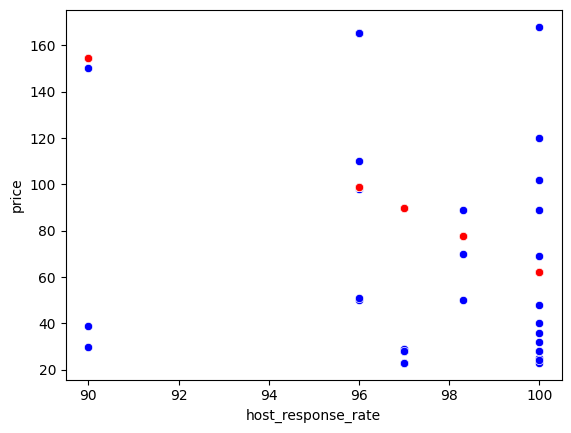

In [45]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_response_rate', y='price', color='blue', data=ft_3)
sns.scatterplot(x='host_response_rate', y='Predicciones_1', color='red', data=ft_3)

Grafico 2:

<Axes: xlabel='host_is_superhost', ylabel='price'>

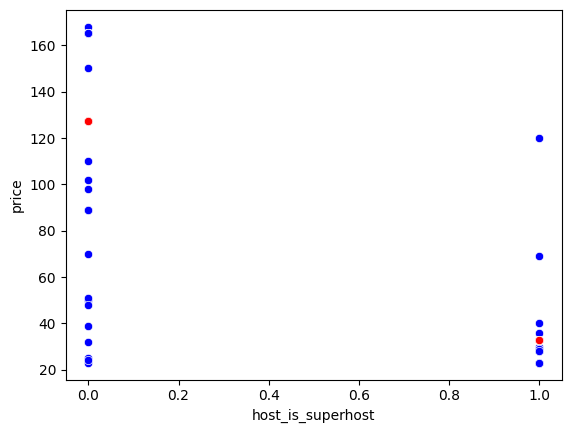

In [46]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=ft_3)
sns.scatterplot(x='host_is_superhost', y='Predicciones_2', color='red', data=ft_3)

Grafico 3:

<Axes: xlabel='room_type', ylabel='price'>

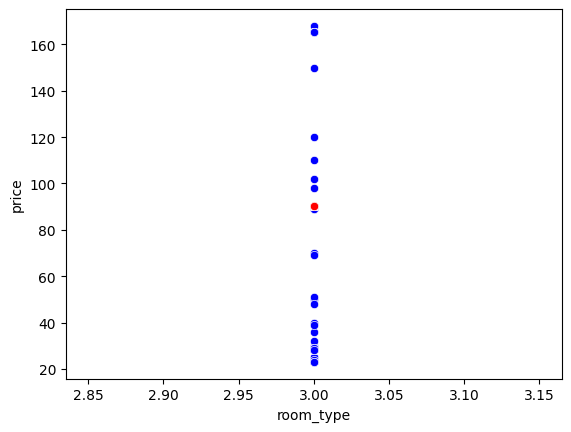

In [47]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='room_type', y='price', color='blue', data=ft_3)
sns.scatterplot(x='room_type', y='Predicciones_3', color='red', data=ft_3)

Grafico 4:

<Axes: xlabel='host_identity_verified', ylabel='price'>

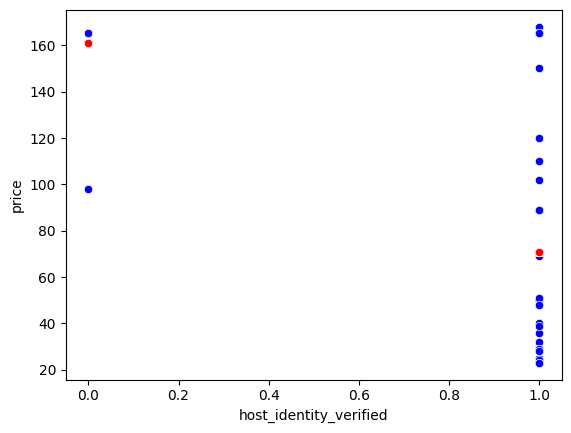

In [48]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=ft_3)
sns.scatterplot(x='host_identity_verified', y='Predicciones_4', color='red', data=ft_3)

Grafico 5:

<Axes: xlabel='property_type', ylabel='price'>

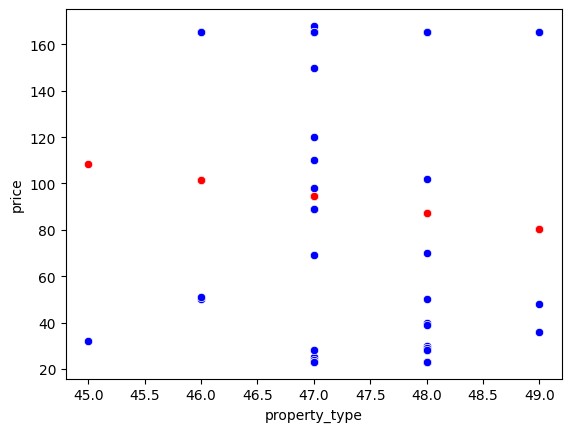

In [49]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='property_type', y='price', color='blue', data=ft_3)
sns.scatterplot(x='property_type', y='Predicciones_5', color='red', data=ft_3)

Grafico 6:

<Axes: xlabel='instant_bookable', ylabel='price'>

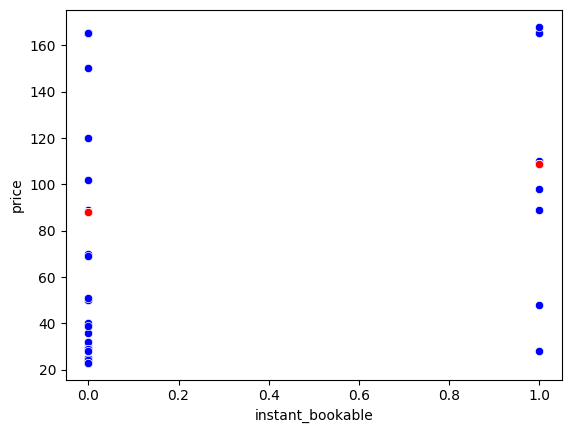

In [50]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='instant_bookable', y='price', color='blue', data=ft_3)
sns.scatterplot(x='instant_bookable', y='Predicciones_6', color='red', data=ft_3)

Grafico 7:

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

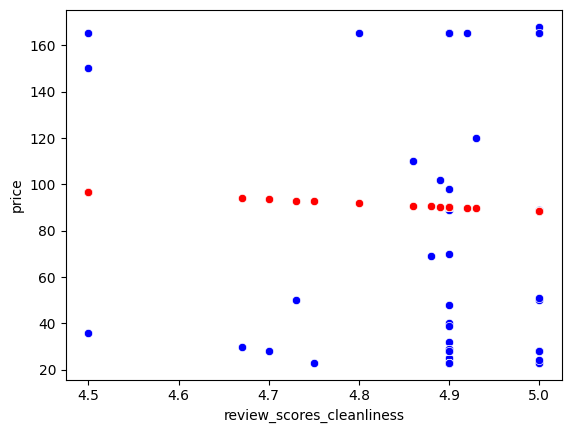

In [51]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=ft_3)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones_7', color='red', data=ft_3)

Grafico 8:

<Axes: xlabel='bathrooms', ylabel='accommodates'>

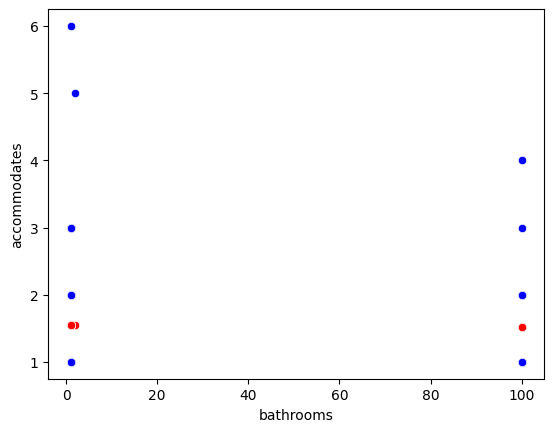

In [52]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='bathrooms', y='accommodates', color='blue', data=ft_3)
sns.scatterplot(x='bathrooms', y='Predicciones_8', color='red', data=ft_3)

Obtenemos los coeficientes de determinación

In [53]:
#Modelo 1
coef_deter_t1 = Model_t1.score(X = var_indep_t, y = var_dep_t)
coef_deter_t1

0.09484526306768448

In [54]:
#Modelo 2
coef_deter_t2 = Model_t2.score(X = var_indep_t2, y = var_dep_t)
coef_deter_t2

0.5328835468425002

In [ ]:
#Modelo 3
coef_deter_t3 = Model_t3.score(X = var_indep_t3, y = var_dep_t)
coef_deter_t3

0.0

In [56]:
#Modelo 4
coef_deter_t4 = Model_t4.score(X = var_indep_t4, y = var_dep_t)
coef_deter_t4

0.3443115358362846

In [ ]:
#Modelo 5
coef_deter_t5 = Model_t5.score(X = var_indep_t5, y = var_dep_t)
coef_deter_t5

0.007247204033514532

In [58]:
#Modelo 6
coef_deter_t6 = Model_t6.score(X = var_indep_t6, y = var_dep_t)
coef_deter_t6

0.011316201193866449

In [59]:
#Modelo 7
coef_deter_t7 = Model_t7.score(X = var_indep_t7, y = var_dep_t)
coef_deter_t7

0.0007446821013515903

In [60]:
#Modelo 8
coef_deter_t8 = Model_t8.score(X = var_indep_t8, y = var_dep_t2)
coef_deter_t8

0.0001366207877735448

Obtenemos los coeficientes de correlación 

In [61]:
#Modelo 1
coef_correl_t1 = np.sqrt(coef_deter_t1)
coef_correl_t1

0.30796958139998903

In [62]:
#Modelo 2
coef_correl_t2 = np.sqrt(coef_deter_t2)
coef_correl_t2

0.7299887306270557

In [63]:
#Modelo 3
coef_correl_t3 = np.sqrt(coef_deter_t3)
coef_correl_t3

0.0

In [64]:
#Modelo 4
coef_correl_t4 = np.sqrt(coef_deter_t4)
coef_correl_t4

0.5867806539383218

In [65]:
#Modelo 5
coef_correl_t5 = np.sqrt(coef_deter_t5)
coef_correl_t5

0.08513051176584416

In [66]:
#Modelo 6
coef_correl_t6 = np.sqrt(coef_deter_t6)
coef_correl_t6

0.10637763483865605

In [67]:
#Modelo 7
coef_correl_t7 = np.sqrt(coef_deter_t7)
coef_correl_t7

0.027288864053888178

In [68]:
#Modelo 8
coef_correl_t8 = np.sqrt(coef_deter_t8)
coef_correl_t8

0.011688489542004339

Graficamos todas las dispersiones entre todas las variables 

c:\Users\Paulina\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paulina\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paulina\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paulina\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: Futur

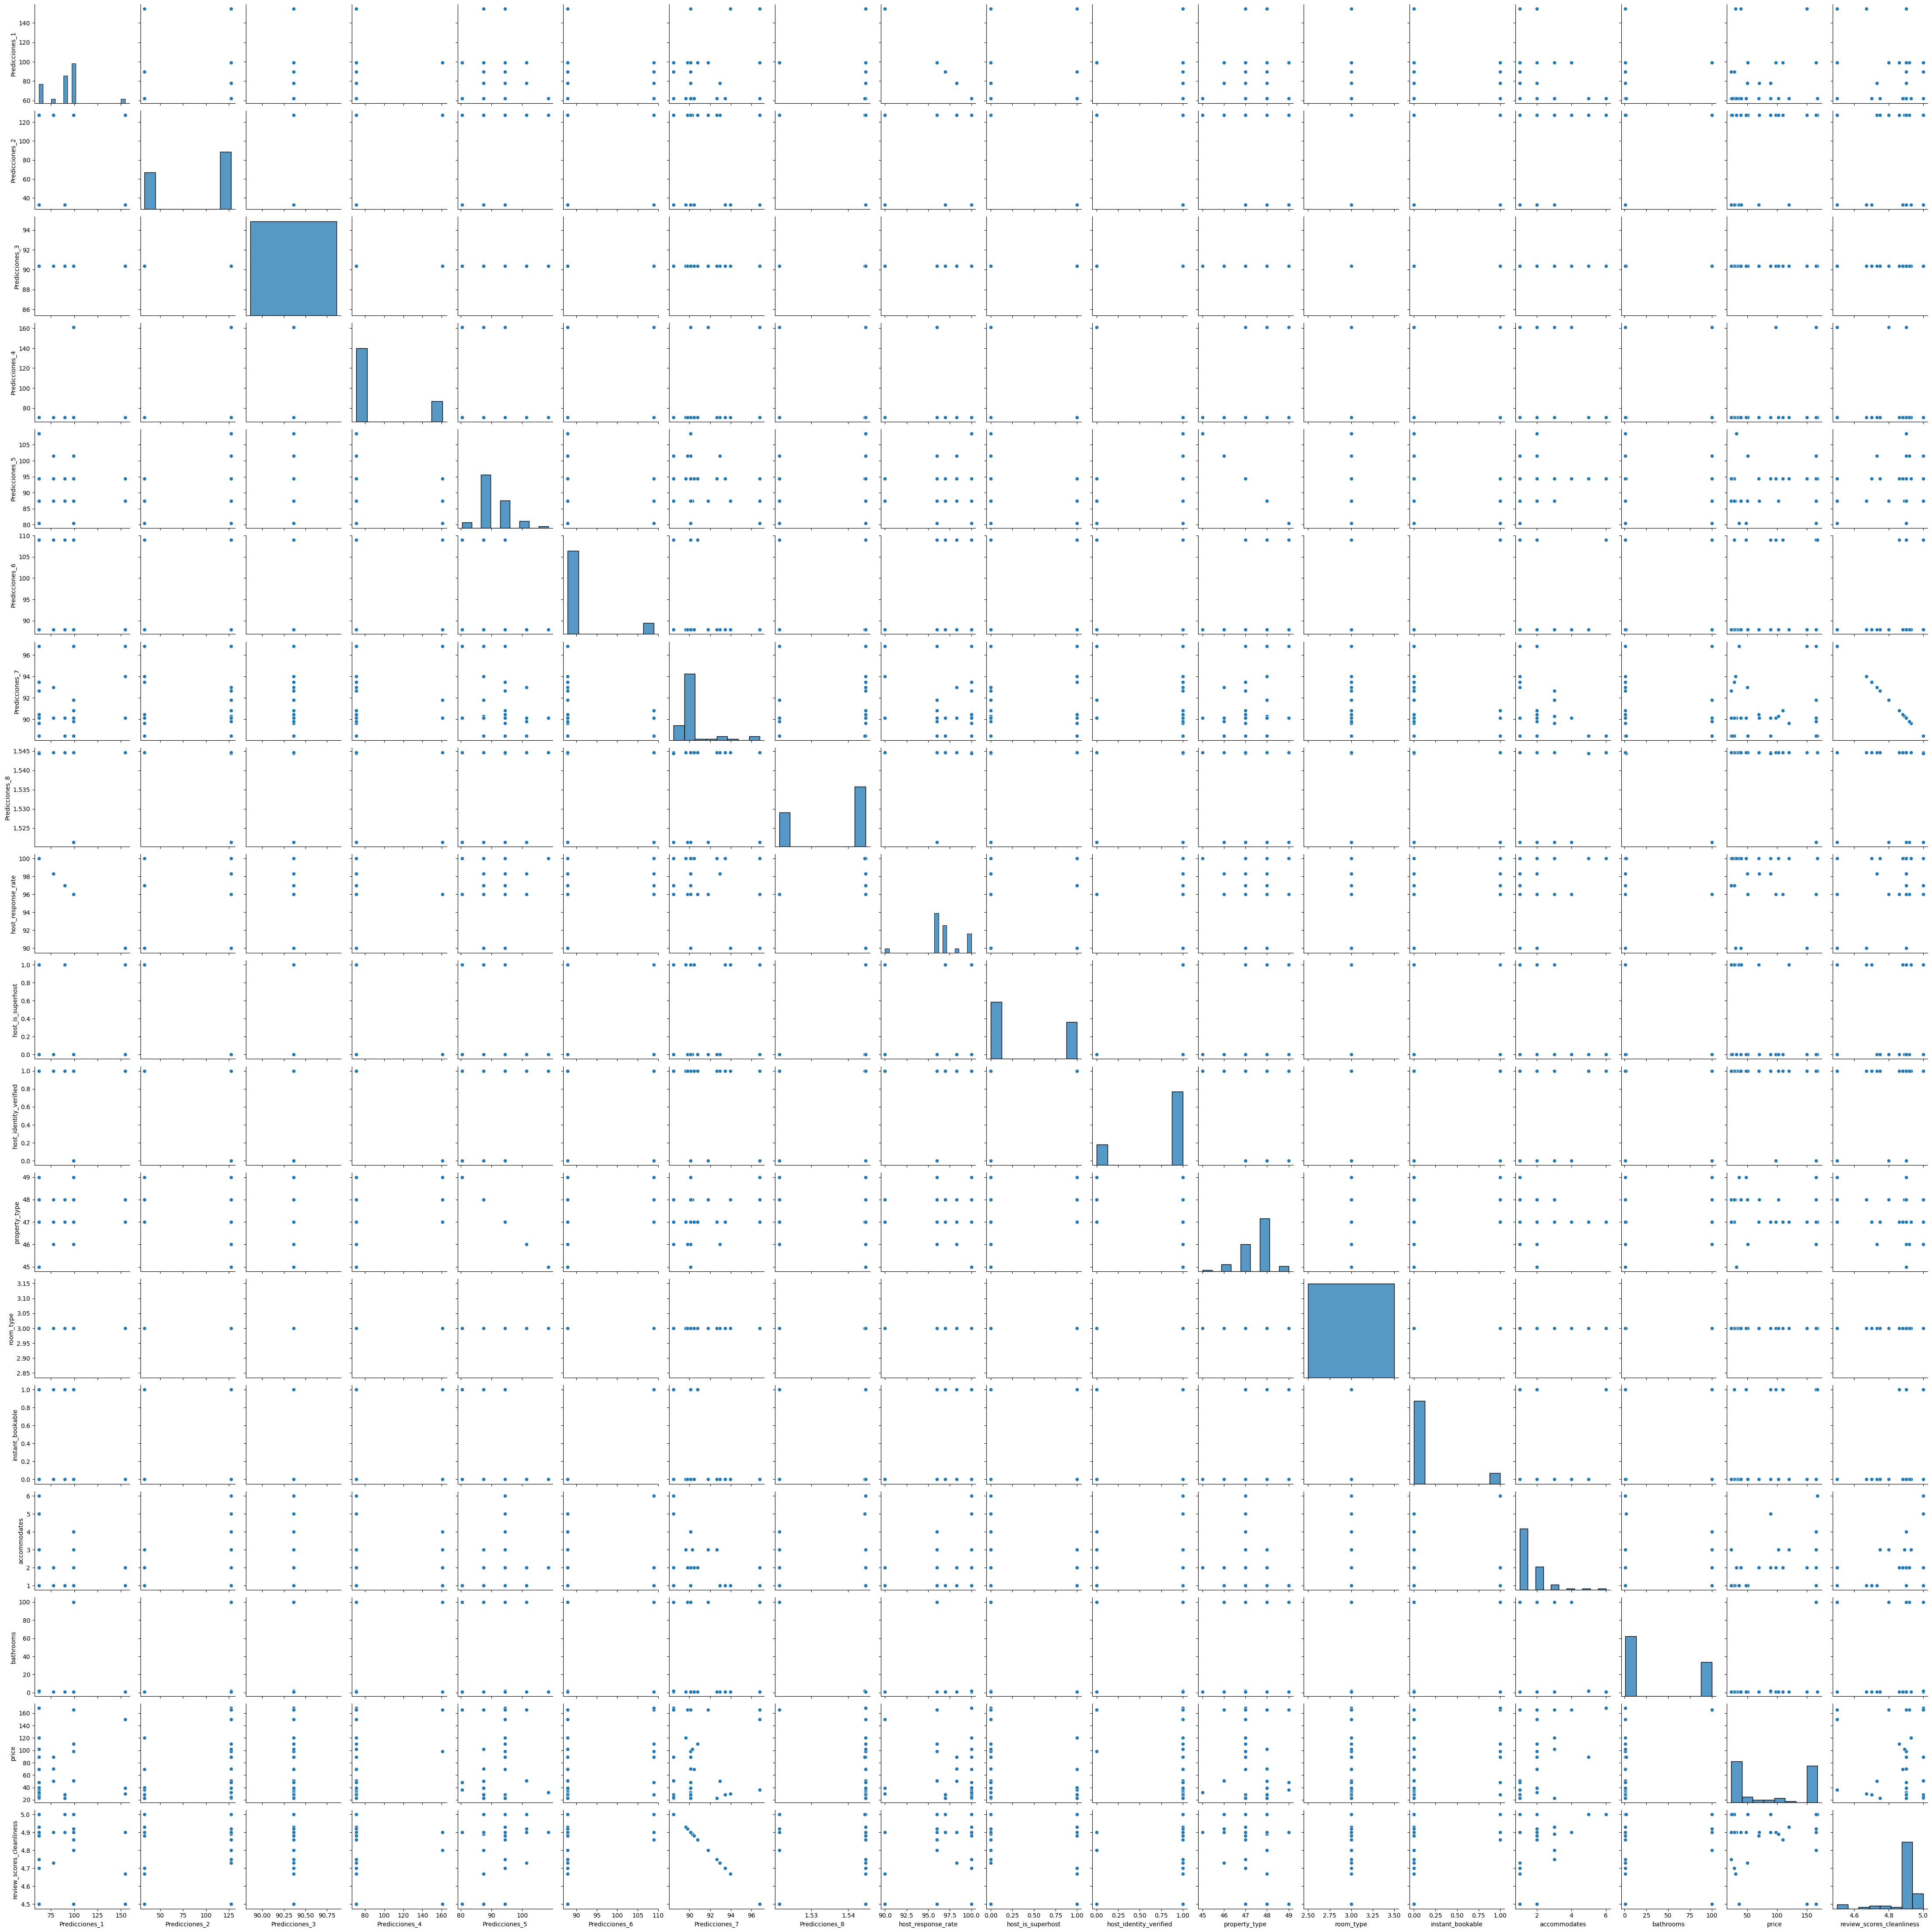

In [73]:
sns.pairplot(ft_3)

Obtenemos las correlaciones entre las variables 

In [69]:
#Encontramos todas las correlaciones entre las variables 
corr_factors_t = ft_3.corr()
corr_factors_t

Predicciones_1  Predicciones_2  Predicciones_3  \
Predicciones_1                   1.000000        0.177497             NaN   
Predicciones_2                   0.177497        1.000000             NaN   
Predicciones_3                        NaN             NaN             NaN   
Predicciones_4                   0.235084        0.422577             NaN   
Predicciones_5                  -0.103869        0.283717             NaN   
Predicciones_6                  -0.081045        0.197606             NaN   
Predicciones_7                   0.193325       -0.011641             NaN   
Predicciones_8                  -0.335849       -0.604748             NaN   
host_response_rate              -1.000000       -0.177497             NaN   
host_is_superhost               -0.177497       -1.000000             NaN   
host_identity_verified          -0.235084       -0.422577             NaN   
property_type                    0.103869       -0.283717             NaN   
room_type                             NaN             NaN             NaN   
instant_bookable                -0.081045        0.197606             NaN   
accommodates                    -0.214057        0.325228             NaN   
bathrooms                        0.335849        0.604748             NaN   
price                            0.307970        0.729989             NaN   
review_scores_cleanliness       -0.193325        0.011641             NaN   

                           Predicciones_4  Predicciones_5  Predicciones_6  \
Predicciones_1                   0.235084       -0.103869       -0.081045   
Predicciones_2                   0.422577        0.283717        0.197606   
Predicciones_3                        NaN             NaN             NaN   
Predicciones_4                   1.000000       -0.150965       -0.081118   
Predicciones_5                  -0.150965        1.000000       -0.021326   
Predicciones_6                  -0.081118       -0.021326        1.000000   
Predicciones_7                   0.098494       -0.078138       -0.119579   
Predicciones_8                  -0.626088        0.019661        0.084752   
host_response_rate              -0.235084        0.103869        0.081045   
host_is_superhost               -0.422577       -0.283717       -0.197606   
host_identity_verified          -1.000000        0.150965        0.081118   
property_type                    0.150965       -1.000000        0.021326   
room_type                             NaN             NaN             NaN   
instant_bookable                -0.081118       -0.021326        1.000000   
accommodates                     0.035128        0.264904        0.222859   
bathrooms                        0.626088       -0.019661       -0.084752   
price                            0.586781        0.085131        0.106378   
review_scores_cleanliness       -0.098494        0.078138        0.119579   

                           Predicciones_7  Predicciones_8  host_response_rate  \
Predicciones_1                   0.193325       -0.335849           -1.000000   
Predicciones_2                  -0.011641       -0.604748           -0.177497   
Predicciones_3                        NaN             NaN                 NaN   
Predicciones_4                   0.098494       -0.626088           -0.235084   
Predicciones_5                  -0.078138        0.019661            0.103869   
Predicciones_6                  -0.119579        0.084752            0.081045   
Predicciones_7                   1.000000        0.021228           -0.193325   
Predicciones_8                   0.021228        1.000000            0.335849   
host_response_rate              -0.193325        0.335849            1.000000   
host_is_superhost                0.011641        0.604748            0.177497   
host_identity_verified          -0.098494        0.626088            0.235084   
property_type                    0.078138       -0.019661           -0.103869   
room_type                             NaN     

In [70]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
corr_factors_t1 = abs(corr_factors_t)
corr_factors_t1

Predicciones_1  Predicciones_2  Predicciones_3  \
Predicciones_1                   1.000000        0.177497             NaN   
Predicciones_2                   0.177497        1.000000             NaN   
Predicciones_3                        NaN             NaN             NaN   
Predicciones_4                   0.235084        0.422577             NaN   
Predicciones_5                   0.103869        0.283717             NaN   
Predicciones_6                   0.081045        0.197606             NaN   
Predicciones_7                   0.193325        0.011641             NaN   
Predicciones_8                   0.335849        0.604748             NaN   
host_response_rate               1.000000        0.177497             NaN   
host_is_superhost                0.177497        1.000000             NaN   
host_identity_verified           0.235084        0.422577             NaN   
property_type                    0.103869        0.283717             NaN   
room_type                             NaN             NaN             NaN   
instant_bookable                 0.081045        0.197606             NaN   
accommodates                     0.214057        0.325228             NaN   
bathrooms                        0.335849        0.604748             NaN   
price                            0.307970        0.729989             NaN   
review_scores_cleanliness        0.193325        0.011641             NaN   

                           Predicciones_4  Predicciones_5  Predicciones_6  \
Predicciones_1                   0.235084        0.103869        0.081045   
Predicciones_2                   0.422577        0.283717        0.197606   
Predicciones_3                        NaN             NaN             NaN   
Predicciones_4                   1.000000        0.150965        0.081118   
Predicciones_5                   0.150965        1.000000        0.021326   
Predicciones_6                   0.081118        0.021326        1.000000   
Predicciones_7                   0.098494        0.078138        0.119579   
Predicciones_8                   0.626088        0.019661        0.084752   
host_response_rate               0.235084        0.103869        0.081045   
host_is_superhost                0.422577        0.283717        0.197606   
host_identity_verified           1.000000        0.150965        0.081118   
property_type                    0.150965        1.000000        0.021326   
room_type                             NaN             NaN             NaN   
instant_bookable                 0.081118        0.021326        1.000000   
accommodates                     0.035128        0.264904        0.222859   
bathrooms                        0.626088        0.019661        0.084752   
price                            0.586781        0.085131        0.106378   
review_scores_cleanliness        0.098494        0.078138        0.119579   

                           Predicciones_7  Predicciones_8  host_response_rate  \
Predicciones_1                   0.193325        0.335849            1.000000   
Predicciones_2                   0.011641        0.604748            0.177497   
Predicciones_3                        NaN             NaN                 NaN   
Predicciones_4                   0.098494        0.626088            0.235084   
Predicciones_5                   0.078138        0.019661            0.103869   
Predicciones_6                   0.119579        0.084752            0.081045   
Predicciones_7                   1.000000        0.021228            0.193325   
Predicciones_8                   0.021228        1.000000            0.335849   
host_response_rate               0.193325        0.335849            1.000000   
host_is_superhost                0.011641        0.604748            0.177497   
host_identity_verified           0.098494        0.626088            0.235084   
property_type                    0.078138        0.019661            0.103869   
room_type                             NaN     

<Axes: >

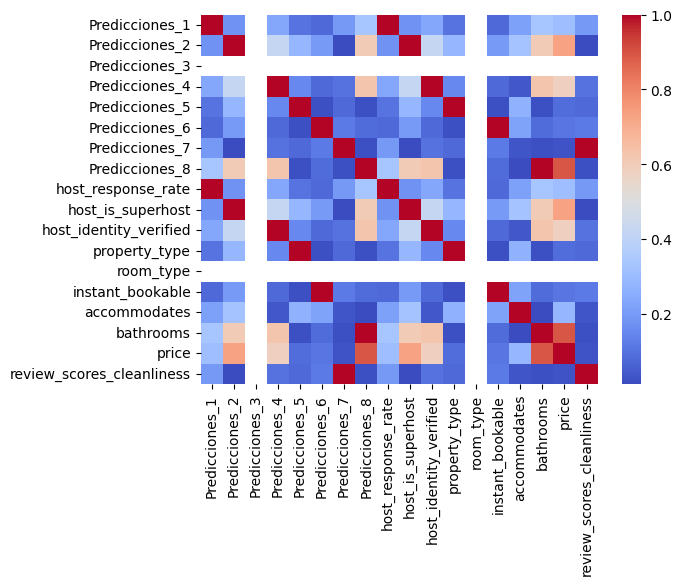

In [71]:
#Graficamos el mapa de calor de las coeficientes de correlación 
heart_nap_t = sns.heatmap(corr_factors_t1, cmap= 'coolwarm')
heart_nap_t

c:\Users\Paulina\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

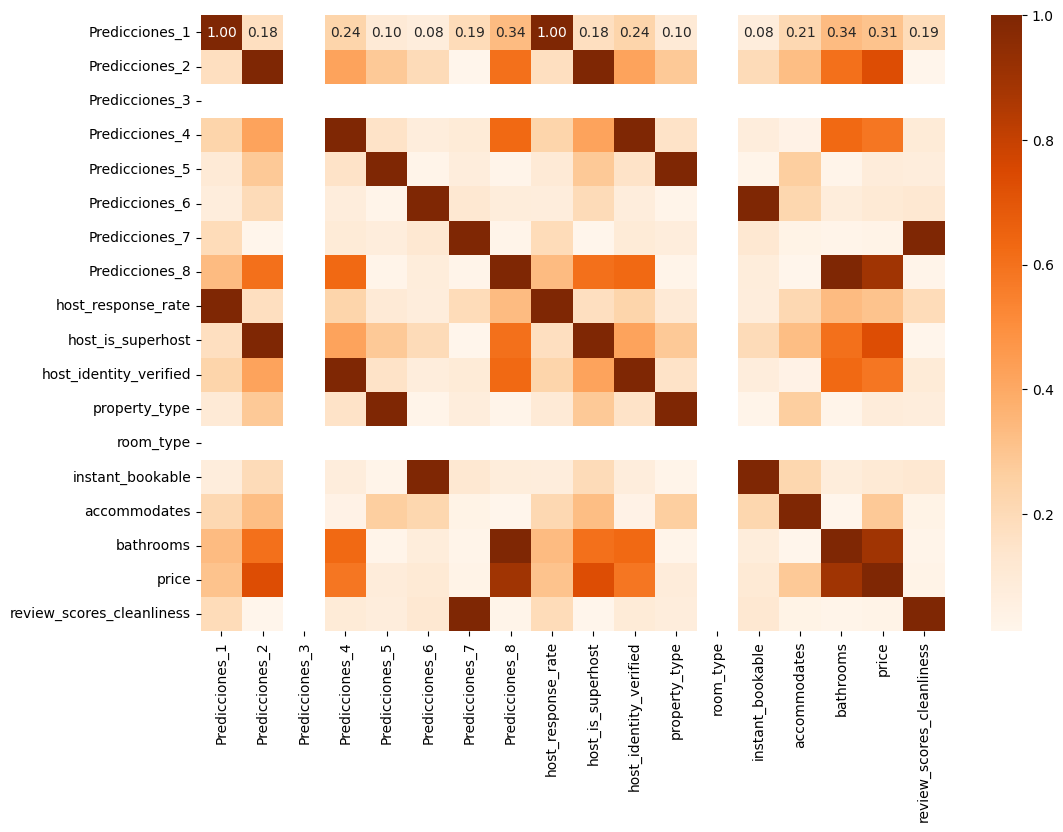

In [72]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
heart_nap_t2 = sns.heatmap(corr_factors_t1, cmap= 'Oranges', annot=True, fmt=".2f")
heart_nap_t2